In [84]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.io import mmread
import seaborn as sns

TASK 1
Plotting graph of a social network of bottlenose dolphins from https://networkrepository.com/soc-dolphins.php

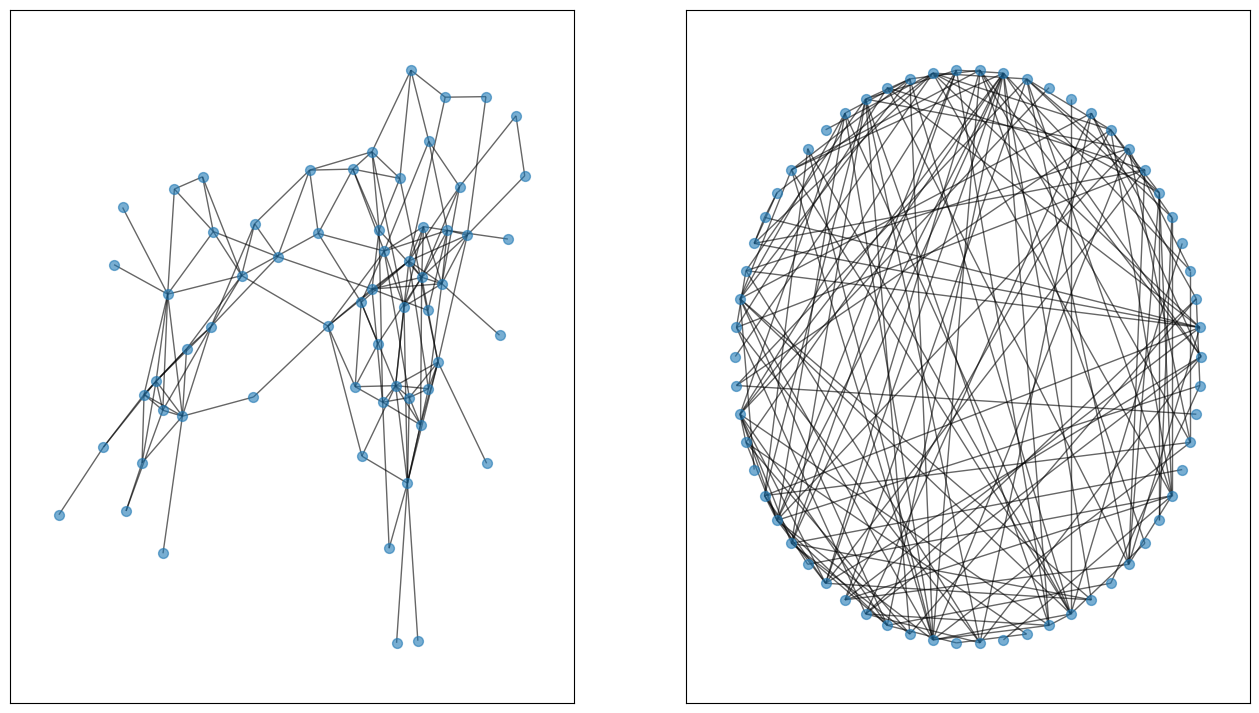

<Figure size 640x480 with 0 Axes>

In [280]:
fig, ax = plt.subplots(1,2, figsize=(16,9))
a = mmread('soc-dolphins.mtx')
H=nx.from_scipy_sparse_array(a)
nx.draw_networkx(H, with_labels=False,node_size =50,alpha=0.6, ax=ax[0])
nx.draw_networkx(H, with_labels=False,node_size =50,alpha=0.6,pos=nx.circular_layout(H),ax=ax[1])
plt.show()
plt.clf()

TASK 2

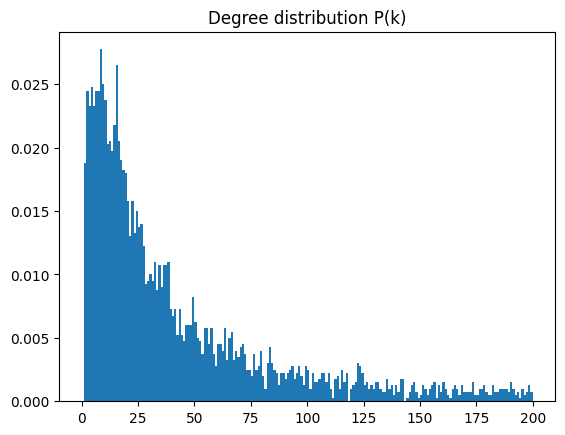

Average degree is 43.69101262688784


In [281]:
import numpy as np
nodes1 = np.loadtxt('facebook_combined.txt',usecols=0,dtype=int)
nodes2 = np.loadtxt('facebook_combined.txt',usecols=1,dtype=int)
nodes = np.append(nodes1,nodes2)
unique, counts = np.unique(nodes, return_counts=True)
node_dict = dict(zip(unique,counts))
degrees = list(node_dict.values())

plt.hist(degrees,bins=200,density=True,range=[0,200])
plt.title("Degree distribution P(k)")
plt.show()

avg_degree = np.mean(degrees)
print(f"Average degree is {avg_degree}")


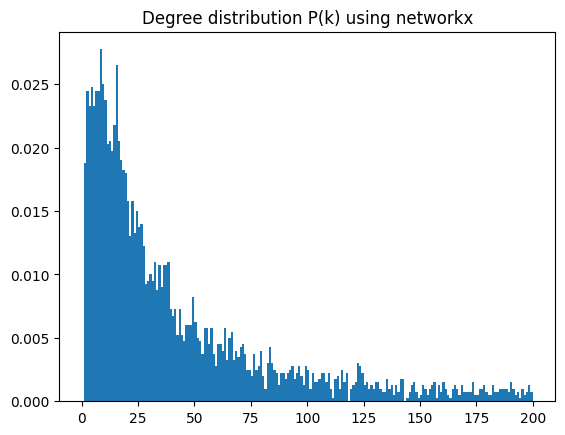

Average degree is 43.69101262688784


In [282]:
G = nx.read_edgelist(path = 'facebook_combined.txt',nodetype=int)
nx_degrees = dict(G.degree).values()
plt.hist(nx_degrees,bins=200,density=True,range=[0,200])
plt.title("Degree distribution P(k) using networkx")
plt.show()
print(f"Average degree is {np.mean(list(nx_degrees))}")

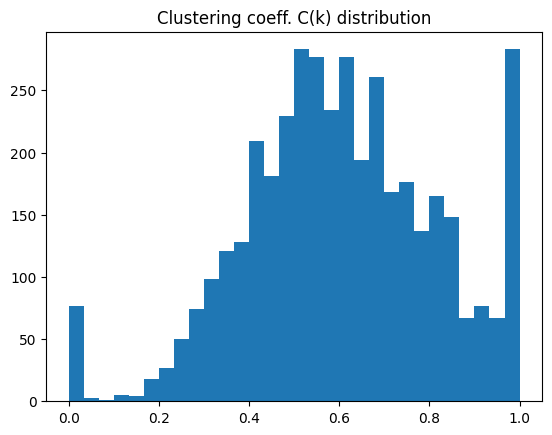

Average C(k) is 0.6055467186200862


In [283]:
nx_clust = list(nx.clustering(G).values())
plt.hist(nx_clust,bins=30)
plt.title("Clustering coeff. C(k) distribution")
plt.show()
print(f"Average C(k) is {np.mean(nx_clust)}")

In [6]:
G = nx.read_edgelist(path = 'facebook_combined.txt',nodetype=int)
p = nx.shortest_path(G,source=1)
n = len(list(G.nodes))
paths_l = []

for i in range(n):
    path_i = nx.shortest_path(G,source=i)
    for j in np.arange(i,n):
        paths_l.append(path_i[j])

In [7]:
paths_l = [len(x) for x in paths_l]

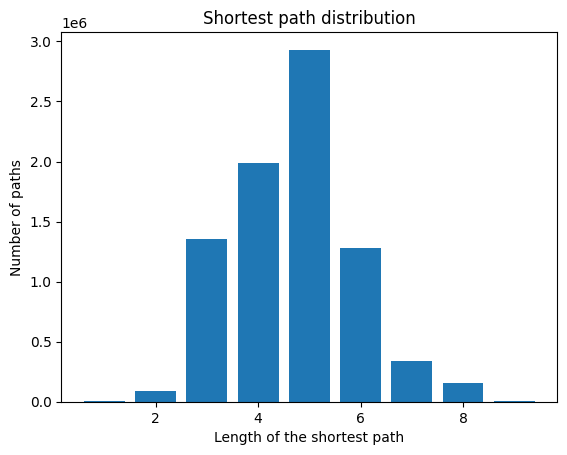

In [8]:
unique, counts = np.unique(paths_l, return_counts=True)
plt.bar(x=unique,height=counts)
plt.title("Shortest path distribution")
plt.xlabel("Length of the shortest path")
plt.ylabel("Number of paths")
plt.show()

In [9]:
diameter = np.max(unique)
print(f"Diameter of this graph is {diameter}")

Diameter of this graph is 9


In [10]:
average_path = np.mean(paths_l)
print(f"AVG path length for this graph is {average_path}")

AVG path length for this graph is 4.690678876008423


TASK 3

Erdos-Renyi model

In [233]:
from itertools import combinations
import random
import numpy as np
def erG(N: int, L: int):
    K = nx.Graph()
    [K.add_node(i) for i in range(N)]
    possibleEdges = list(combinations(list(K.nodes),2))
    selected = random.sample(possibleEdges,L)
    K.add_edges_from(selected)
    return K
ER = erG(4000,7998)



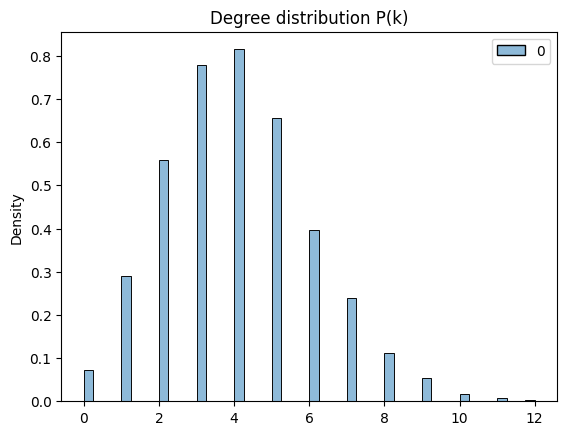

Average degree is 3.999


In [234]:
def graphDegrees(G):    
    nx_degrees = dict(G.degree).values()
    sns.histplot(nx_degrees, stat='density')
    plt.title("Degree distribution P(k)")
    plt.show()
    print(f"Average degree is {np.mean(list(nx_degrees))}")
graphDegrees(ER)

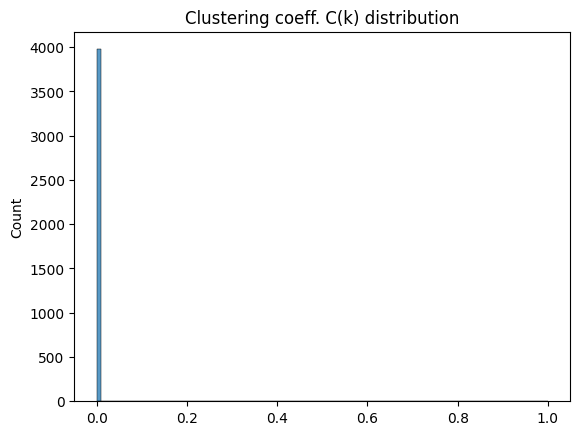

Average C(k) is 0.0010265873015873014


In [235]:
def graphClustering(G):
    nx_clust = list(nx.clustering(G).values())
    sns.histplot(nx_clust,bins=100)
    plt.title("Clustering coeff. C(k) distribution")
    plt.show()
    print(f"Average C(k) is {np.mean(nx_clust)}")
graphClustering(ER)

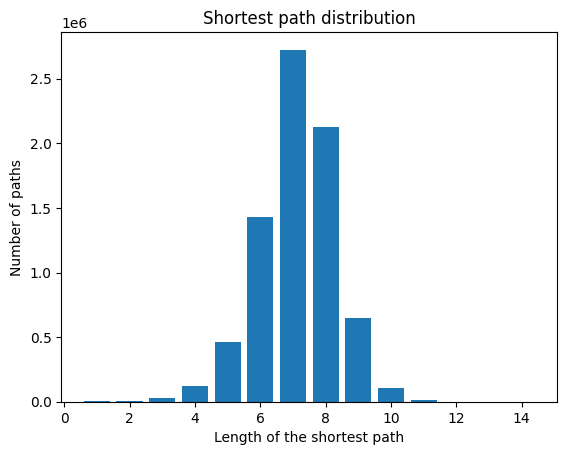

Diameter of this graph is 14
AVG path length for this graph is 7.116024383813991


In [247]:
def graphPaths(G):
    p = nx.shortest_path(G,source=1)
    n = len(list(G.nodes))
    paths_l = []

    for i in range(n):
        path_i = nx.shortest_path(G,source=i)
        for j in np.arange(i,n):
            if(j in path_i):
                paths_l.append(path_i[j])
    paths_l = [len(x) for x in paths_l]
    unique, counts = np.unique(paths_l, return_counts=True)
    plt.bar(x=unique,height=counts)
    plt.title("Shortest path distribution")
    plt.xlabel("Length of the shortest path")
    plt.ylabel("Number of paths")
    plt.show()
    diameter = np.max(unique)
    print(f"Diameter of this graph is {diameter}")
    average_path = np.mean(paths_l)
    print(f"AVG path length for this graph is {average_path}")
graphPaths(ER)

Erdos-Renyi-Gilbert model

In [252]:
def ergG(N,p):
    K = nx.Graph()
    [K.add_node(i) for i in range(N)]
    possibleEdges = list(combinations(list(K.nodes),2))
    selected = [edge for edge in possibleEdges if random.random()<=p]
    K.add_edges_from(selected)
    return K
ERG = ergG(4000,0.001)


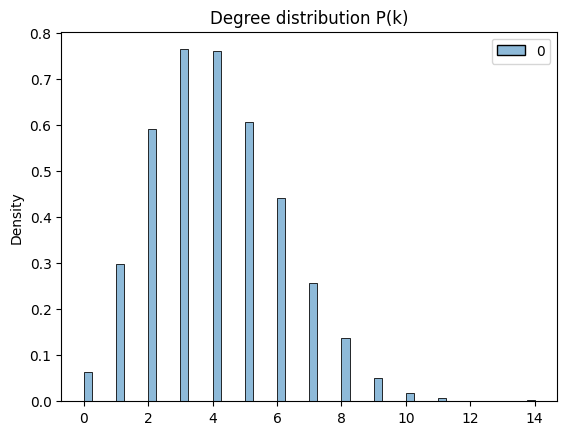

Average degree is 4.0375


In [253]:
graphDegrees(ERG)

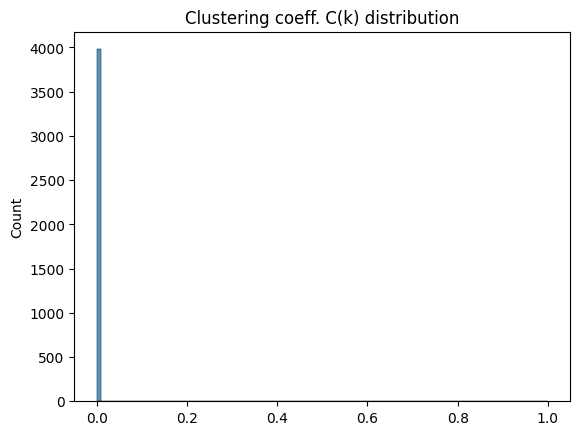

Average C(k) is 0.0007382936507936508


In [254]:
graphClustering(ERG)

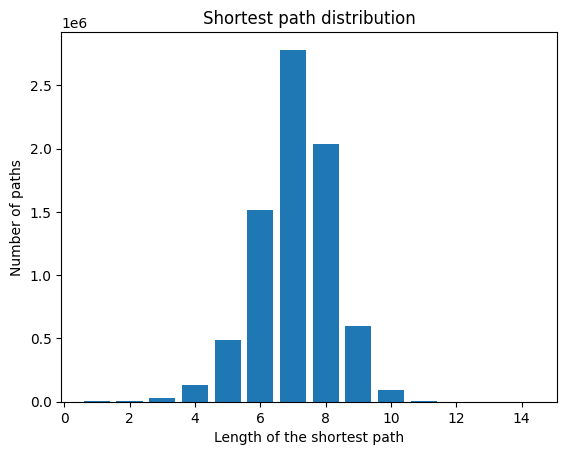

Diameter of this graph is 14
AVG path length for this graph is 7.06420380397417


In [255]:
graphPaths(ERG)

Watts and Strogatz model

In [276]:
WS = nx.watts_strogatz_graph(4000,4,.8)

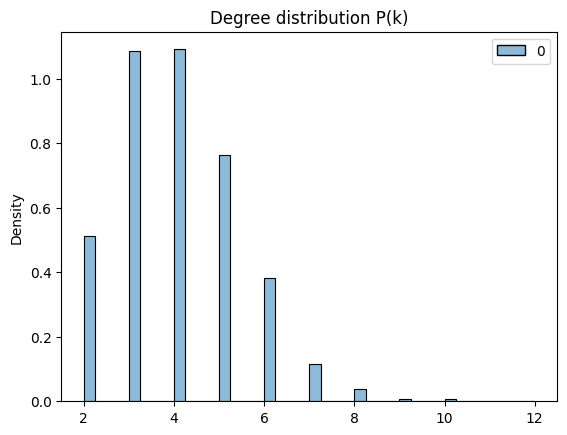

Average degree is 4.0


In [277]:
graphDegrees(WS)

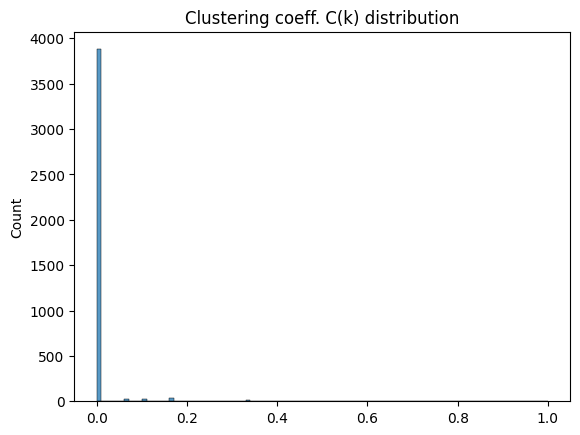

Average C(k) is 0.004965097402597402


In [278]:
graphClustering(WS)

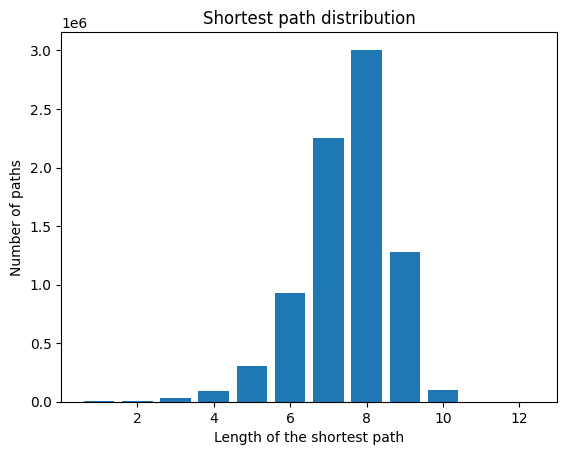

Diameter of this graph is 12
AVG path length for this graph is 7.483131342164459


In [279]:
graphPaths(WS)

Left: E-R MODEL N=4000, L=7998 <br>
Middle: E-R-G MODEL N=4000, p=0.001 <br>
Right: W-S MODEL N=4000, k=4, p=0.8

<img src="degree_1.png" width="400" height="400"/>  <img src="degree_2.png" width="400" height="400"/> <img src="degree_3.png" width="400" height="400"/> 

AVG degree: <br>
E-R MODEL: 3.999 <br>
E-R-G MODEL: 4.0375 <br>
W-S MODEL: 4.0

<img src="Clust_1.png" width="400" height="400"/>  <img src="clust_2.png" width="400" height="400"/> <img src="clust_3.png" width="400" height="400"/> 

AVG Clustering coeff.: <br>
E-R MODEL: 0.0010265873015873014 <br>
E-R-G MODEL: 0.0007382936507936508 <br>
W-S MODEL: 0.004965097402597402

<img src="path_1.png" width="400" height="400"/>  <img src="path_2.png" width="400" height="400"/> <img src="path_3.png" width="400" height="400"/> 

Diameter: <br>
E-R MODEL: 14 <br>
E-R-G MODEL: 14 <br>
W-S MODEL: 12

AVG path length: <br>
E-R MODEL: 7.116024383813991 <br>
E-R-G MODEL: 7.06420380397417 <br>
W-S MODEL: 7.483131342164459